<h1 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">Exploratory Data Analysis Mini Project </h1>
     


<h4 class="list-group-item list-group-item-action active" >1. DESCRIPTIVE STATISTICS</h4>

>#### 1. Create a dataframe using below data and answer the below questions:

        Hourly_Income = [1000,2009,24418,444478,324235,243242,3434234,7567457,9235,238237,1312,3412]
        Hourly_Expense =  [651361,217371,2746,2356,13436,5732,346346,3463,1132,23534,242235,235235]
        family_members_count = [3,4,2,3,1,4,5,6,3,6,3,5]
        House_rent = [1299,2300,3411,3422,4566,4211,4600,736,672,0,734,2374]
        Highest_income_Member = ["Olivia","George","Isla","Harry","Ava","Noah","Sophia","Jacobi","Freddie","Ella","Grace","Ella"]
        
        
>##### A. Display the five point summary of the data. 
>##### B. What is the mean of the hourly expense?
>##### C. What is the median of the hourly expense?
>##### D. Find the family member with maximum income and using a suitable graph.
>##### E. Calculate IQR(the difference between 75% and 25% quartile) for `Hourly_Income` and `Hourly_Expense`.
>##### F. Calculate the standard deviation for first 2 columns.
>##### G. Calculate variance for the first 4 columns

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.DataFrame(
  {
      "Hourly_Income":[1000,2009,24418,444478,324235,243242,3434234,7567457,9235,238237,1312,3412],
    "Hourly_Expense": [651361,217371,2746,2356,13436,5732,346346,3463,1132,23534,242235,235235],
      "family_members_count":[3,4,2,3,1,4,5,6,3,6,3,5],
      "House_rent":[1299,2300,3411,3422,4566,4211,4600,736,672,0,734,2374],
      "Highest_income_Member":["Olivia","George","Isla","Harry","Ava","Noah","Sophia","Jacobi","Freddie","Ella","Grace","Ella"]
  }
)
df

,Hourly_Income,Hourly_Expense,family_members_count,House_rent,Highest_income_Member
0,1000,651361,3,1299,Olivia
1,2009,217371,4,2300,George
2,24418,2746,2,3411,Isla
3,444478,2356,3,3422,Harry
4,324235,13436,1,4566,Ava
5,243242,5732,4,4211,Noah
6,3434234,346346,5,4600,Sophia
7,7567457,3463,6,736,Jacobi
8,9235,1132,3,672,Freddie
9,238237,23534,6,0,Ella


### A. Display the five point summary of the data.

In [3]:
df.describe()

,Hourly_Income,Hourly_Expense,family_members_count,House_rent
count,1.200000e+01,12.000000,12.000000,12.000000
mean,1.024439e+06,145412.250000,3.750000,2360.416667
std,2.274083e+06,202831.565333,1.544786,1661.663813
min,1.000000e+03,1132.000000,1.000000,0.000000
25%,3.061250e+03,3283.750000,3.000000,735.500000
50%,1.313275e+05,18485.000000,3.500000,2337.000000
75%,3.542958e+05,236985.000000,5.000000,3619.250000
max,7.567457e+06,651361.000000,6.000000,4600.000000


### B. What is the mean of the hourly expense?

In [4]:
df["Hourly_Expense"].mean()

145412.25

### C. What is the median of the hourly expense?

In [5]:
df["Hourly_Expense"].median()

18485.0

### D. Find the family member with maximum income and using a suitable graph.


<AxesSubplot:>

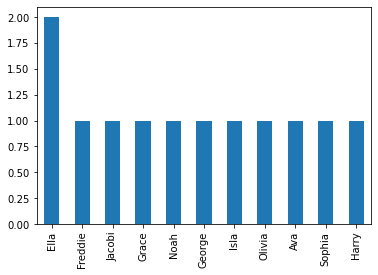

In [6]:
df["Highest_income_Member"].value_counts().plot(kind="bar")

<AxesSubplot:xlabel='Highest_income_Member', ylabel='Hourly_Income'>

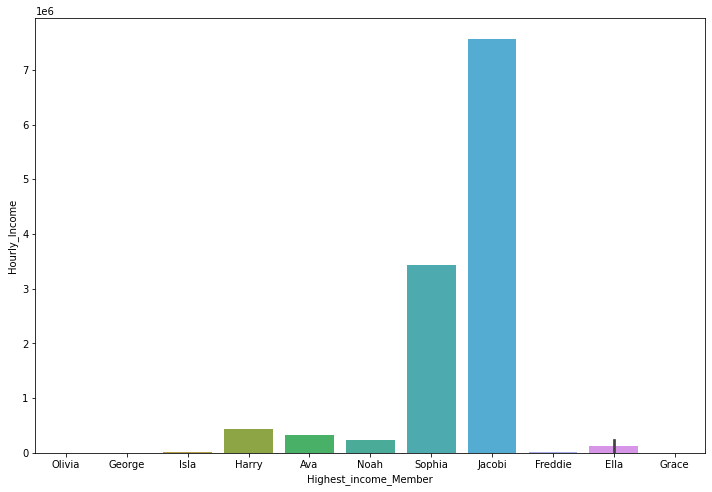

In [7]:
plt.figure(figsize =(12,8))

sns.barplot(x='Highest_income_Member',y='Hourly_Income',data=df)

### E.Calculate IQR(the difference between 75% and 25% quartile) for `Hourly_Income` and `Hourly_Expense`.


In [8]:
IQR=df["Hourly_Expense"].quantile(0.75)-df["Hourly_Income"].quantile(0.25)
IQR

233923.75

### F. Calculate the standard deviation for first 2 columns.

In [9]:
pd.DataFrame(df.iloc[:,0:2].std().to_frame()).T

,Hourly_Income,Hourly_Expense
0,2.274083e+06,202831.565333


In [10]:
pd.DataFrame(df.iloc[:,0:2].std()).T

,Hourly_Income,Hourly_Expense
0,2.274083e+06,202831.565333


### G. Calculate variance for the first 4 columns

In [11]:
pd.DataFrame(df.iloc[:,0:4].var().to_frame()).T

,Hourly_Income,Hourly_Expense,family_members_count,House_rent
0,5.171452e+12,4.114064e+10,2.386364,2.761127e+06


<h4 class="list-group-item list-group-item-action active" >2. Preliminary Wrangling,</h4>

>### Dataset Information: 

Dataset recording people to invest in each other in a way that is financially and socially rewarding. On loans, borrowers list loan requests between $ 2,000 and $ 35,000 and individual investors invest as little as $ 25 in each loan listing they select. Prosper handles the servicing of the loan on behalf of the matched borrowers and investors.




>#### A. Read the dataset called Pri-Load.csv
>#### B.  Check the data type and adjust datatype for all other categorical columns.
>#### C. If you find any of the missing values in the ProsperRating column, then drop it.



In [12]:
df=pd.read_csv('Pri-Load.csv')
df.head()

,ListingCreationDate,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),...,EmploymentStatus,AmountDelinquent,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment,LP_InterestandFees,Investors
0,2007-08-26 19:09:29.263000000,36,Completed,14-08-2009 0.00,0.16516,0.1580,0.1380,NaN,NaN,0,...,Self-employed,472.0,3083.333333,0,9425,12-09-2007 0.00,Q3 2007,330.43,1971.14,258
1,2014-02-27 08:28:07.900000000,36,Current,NaN,0.12016,0.0920,0.0820,A,7.0,2,...,Employed,0.0,6125.000000,0,10000,03-03-2014 0.00,Q1 2014,318.93,0.00,1
2,2007-01-05 15:00:47.090000000,36,Completed,17-12-2009 0.00,0.28269,0.2750,0.2400,NaN,NaN,0,...,Not available,NaN,2083.333333,0,3001,17-01-2007 0.00,Q1 2007,123.32,1185.63,41
3,2012-10-22 11:02:35.010000000,36,Current,NaN,0.12528,0.0974,0.0874,A,9.0,16,...,Employed,10056.0,2875.000000,0,10000,01-11-2012 0.00,Q4 2012,321.45,1052.11,158
4,2013-09-14 18:38:39.097000000,36,Current,NaN,0.24614,0.2085,0.1985,D,4.0,2,...,Employed,0.0,9583.333333,0,15000,20-09-2013 0.00,Q3 2013,563.97,1256.63,20


In [13]:
df.shape

(1035, 22)

### B.  Check the data type and adjust datatype for all other categorical columns.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ListingCreationDate        1035 non-null   object 
 1   Term                       1035 non-null   int64  
 2   LoanStatus                 1035 non-null   object 
 3   ClosedDate                 479 non-null    object 
 4   BorrowerAPR                1035 non-null   float64
 5   BorrowerRate               1035 non-null   float64
 6   LenderYield                1035 non-null   float64
 7   ProsperRating (Alpha)      783 non-null    object 
 8   ProsperScore               783 non-null    float64
 9   ListingCategory (numeric)  1035 non-null   int64  
 10  BorrowerState              983 non-null    object 
 11  Occupation                 996 non-null    object 
 12  EmploymentStatus           1010 non-null   object 
 13  AmountDelinquent           954 non-null    float

In [15]:
#Adjust datatype for all other categorical columns
df['Occupation'] = df['Occupation'].astype('category')
df['BorrowerState'] = df['BorrowerState'].astype('category')
df['LoanStatus'] = df['LoanStatus'].astype('category')
df['EmploymentStatus'] = df['EmploymentStatus'].astype('category')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   ListingCreationDate        1035 non-null   object  
 1   Term                       1035 non-null   int64   
 2   LoanStatus                 1035 non-null   category
 3   ClosedDate                 479 non-null    object  
 4   BorrowerAPR                1035 non-null   float64 
 5   BorrowerRate               1035 non-null   float64 
 6   LenderYield                1035 non-null   float64 
 7   ProsperRating (Alpha)      783 non-null    object  
 8   ProsperScore               783 non-null    float64 
 9   ListingCategory (numeric)  1035 non-null   int64   
 10  BorrowerState              983 non-null    category
 11  Occupation                 996 non-null    category
 12  EmploymentStatus           1010 non-null   category
 13  AmountDelinquent           954 no

### C. If you find any of the missing values in the ProsperRating column, then drop it.

In [17]:
df.isnull().sum()

ListingCreationDate            0
Term                           0
LoanStatus                     0
ClosedDate                   556
BorrowerAPR                    0
BorrowerRate                   0
LenderYield                    0
ProsperRating (Alpha)        252
ProsperScore                 252
ListingCategory (numeric)      0
BorrowerState                 52
Occupation                    39
EmploymentStatus              25
AmountDelinquent              81
StatedMonthlyIncome            0
LoanCurrentDaysDelinquent      0
LoanOriginalAmount             0
LoanOriginationDate            0
LoanOriginationQuarter         0
MonthlyLoanPayment             0
LP_InterestandFees             0
Investors                      0
dtype: int64

In [18]:
df = df.dropna(subset=['ProsperRating (Alpha)']).reset_index()
df.isnull().sum()

index                          0
ListingCreationDate            0
Term                           0
LoanStatus                     0
ClosedDate                   556
BorrowerAPR                    0
BorrowerRate                   0
LenderYield                    0
ProsperRating (Alpha)          0
ProsperScore                   0
ListingCategory (numeric)      0
BorrowerState                  0
Occupation                    14
EmploymentStatus               0
AmountDelinquent               0
StatedMonthlyIncome            0
LoanCurrentDaysDelinquent      0
LoanOriginalAmount             0
LoanOriginationDate            0
LoanOriginationQuarter         0
MonthlyLoanPayment             0
LP_InterestandFees             0
Investors                      0
dtype: int64

<h4 class="list-group-item list-group-item-action active" >3. UNIVARIATE ANALYSIS</h4>

>#### A. What are the main features of interest in your dataset?

    Step1: Apply Univariate analysis using suitable charts for[ Loan status, Employment Status, Stated Monthly Income]

    Step2: Check if any column distribution skew or not.

    Step3: Write at least 2 observations for each visualization.




###  Loan status

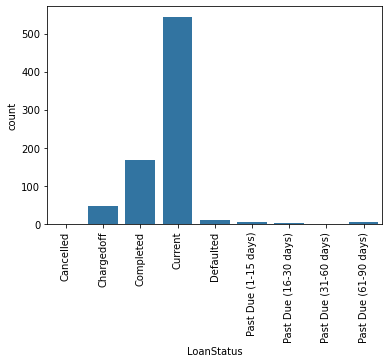

In [19]:
# setting color
base_color = sns.color_palette()[0]
plt.xticks(rotation=90)
sns.countplot(data = df, x = 'LoanStatus', color = base_color);

 
* Most of the loans in the data set are actually current loans. 
* Past due loans are split in several groups based on the length of payment delay.


In [20]:
df.head()

,index,ListingCreationDate,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating (Alpha),ProsperScore,...,EmploymentStatus,AmountDelinquent,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment,LP_InterestandFees,Investors
0,1,2014-02-27 08:28:07.900000000,36,Current,NaN,0.12016,0.0920,0.0820,A,7.0,...,Employed,0.0,6125.000000,0,10000,03-03-2014 0.00,Q1 2014,318.93,0.00,1
1,3,2012-10-22 11:02:35.010000000,36,Current,NaN,0.12528,0.0974,0.0874,A,9.0,...,Employed,10056.0,2875.000000,0,10000,01-11-2012 0.00,Q4 2012,321.45,1052.11,158
2,4,2013-09-14 18:38:39.097000000,36,Current,NaN,0.24614,0.2085,0.1985,D,4.0,...,Employed,0.0,9583.333333,0,15000,20-09-2013 0.00,Q3 2013,563.97,1256.63,20
3,5,2013-12-14 08:26:37.093000000,60,Current,NaN,0.15425,0.1314,0.1214,B,10.0,...,Employed,0.0,8333.333333,0,15000,24-12-2013 0.00,Q4 2013,342.37,327.45,1
4,6,2013-04-12 09:52:56.147000000,36,Current,NaN,0.31032,0.2712,0.2612,E,2.0,...,Employed,0.0,2083.333333,0,3000,18-04-2013 0.00,Q2 2013,122.67,622.45,1


### Employment Status

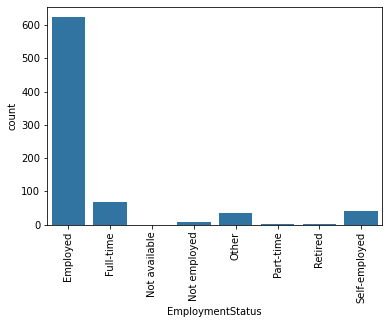

In [21]:
sns.countplot(data = df, x = 'EmploymentStatus', color = base_color);
plt.xticks(rotation = 90);


* The majority of borrowers are employed and all other categories as small part of borrowers. 
* In small Group full time has highest, after that self empolyed are there and so on.

### Stated Monthly Income

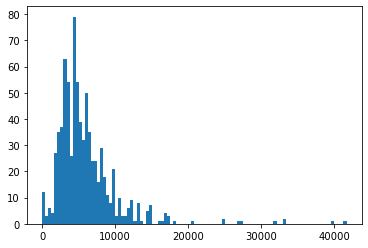

In [22]:
plt.hist(data=df, x='StatedMonthlyIncome', bins=100);

(**Note**: Distribution of stated monthly income is highly skewed to the right. so, we have to check how many outliers are there)

In [23]:
income_std = df['StatedMonthlyIncome'].std()
income_mean = df['StatedMonthlyIncome'].mean()
boundary = income_mean + income_std * 3
len(df[df['StatedMonthlyIncome'] >= boundary])

10

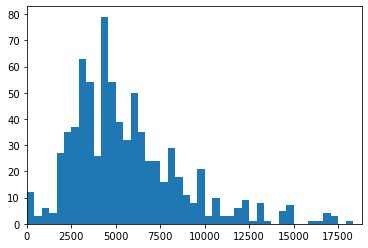

In [24]:
plt.hist(data=df, x='StatedMonthlyIncome', bins=100);
plt.xlim(0, boundary);


* With a boundary of mean and 3 times standard deviations distribution of monthly income.
* But still has noticeable right skew but now we can see that mode is about 5000.  

<h4 class="list-group-item list-group-item-action active" >4. BIVARIATE ANALYSIS</h4>

>#### A. Check the correlation matrix for all numeric variables. Maintain the Strong positive and Negative correlations columns.
>#### B. Check the relation between `LoanOriginalAmount` and `BorrowerAPR` columns. 

    Step1: Use subplots. 
    
        Plot1: Scatter Plot of LoanOriginalAmount and BorrowerAPR columns    

        Plot2: HeatMap of LoanOriginalAmount and BorrowerAPR
        
    Step2: Write your observations.         
        
>#### C.Display the seperate box plot for `y = BorrowerAPR`  with x1 = `LoanStatus`, x2 = `EmploymentStatus` columns.Write your observations. 


### A. Check the correlation matrix for all numeric variables. Maintain the Strong positive and Negative correlations columns.

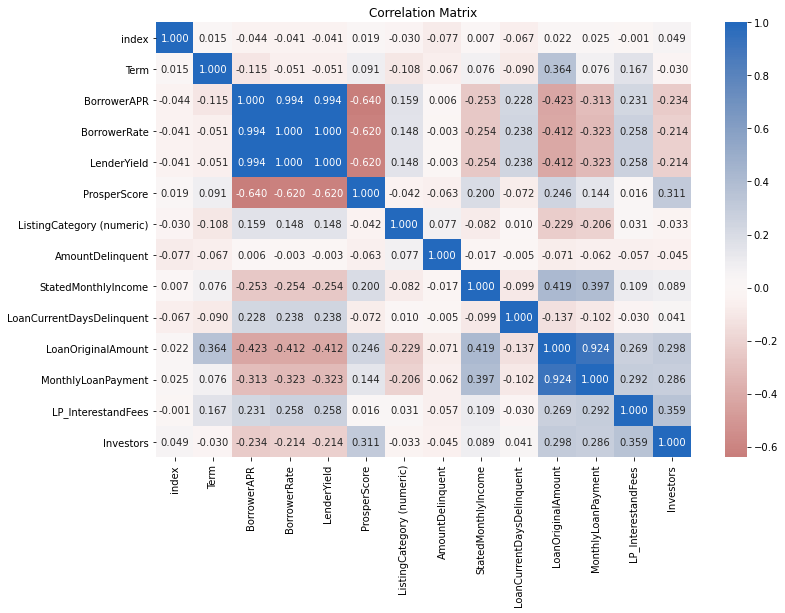

In [25]:
# Correlation matrix for all numeric variables
plt.figure(figsize = [12, 8])
sns.heatmap(df.corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Matrix') 
plt.show()

* Strong positive correlations between Lender yield and Borrower APR. Credit Score upper range has also some weak +ve correlation with prosper score.

* Negative correlation between prosper score & APR, and prosper score & Lender yield.

### B. Check the relation between `LoanOriginalAmount` and `BorrowerAPR` columns. 

    Step1: Use subplots. 
    
        Plot1: Scatter Plot of LoanOriginalAmount and BorrowerAPR columns    

        Plot2: HeatMap of LoanOriginalAmount and BorrowerAPR
        
    Step2: Write your observations.         

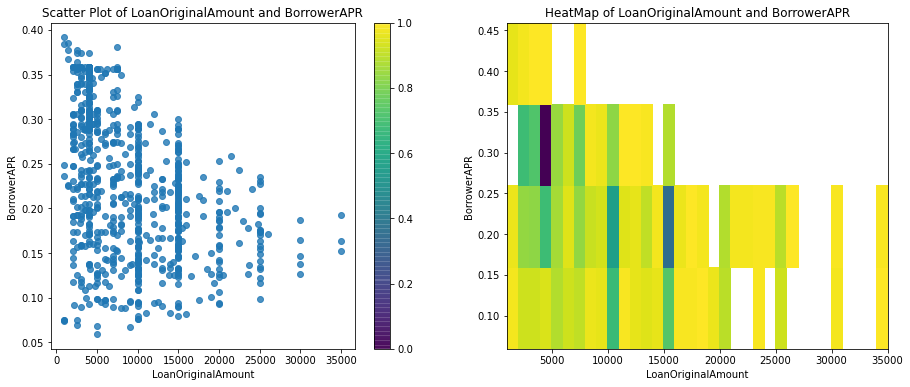

In [26]:
# Checking the relation between LoanOriginalAmount and BorrowerAPR

plt.figure(figsize = [15, 6]) 
plt.subplot(1, 2, 1)
plt.scatter(data = df, x = 'LoanOriginalAmount', y = 'BorrowerAPR',alpha=0.8)
plt.title('Scatter Plot of LoanOriginalAmount and BorrowerAPR')
plt.xlabel('LoanOriginalAmount')
plt.ylabel('BorrowerAPR');
plt.colorbar();

plt.subplot(1, 2, 2)
bins_x = np.arange(df['LoanOriginalAmount'].min(), df['LoanOriginalAmount'].max()+1000, 1000)
bins_y = np.arange(df['BorrowerAPR'].min(), df['BorrowerAPR'].max()+0.1, 0.1)
plt.hist2d(data = df, x = 'LoanOriginalAmount', y = 'BorrowerAPR', bins = [bins_x, bins_y], 
               cmap = 'viridis_r', cmin = 0.5)
plt.title('HeatMap of LoanOriginalAmount and BorrowerAPR')
plt.xlabel('LoanOriginalAmount')
plt.ylabel('BorrowerAPR');

* We see negative relationship between loan original amount and borrower apr, means large loans have relatively less annual interest rate from the borrower.

### C.Display the separate box plot for `y = BorrowerAPR`  with x1 = `LoanStatus`, x2 = `EmploymentStatus` columns.Write your observations. 

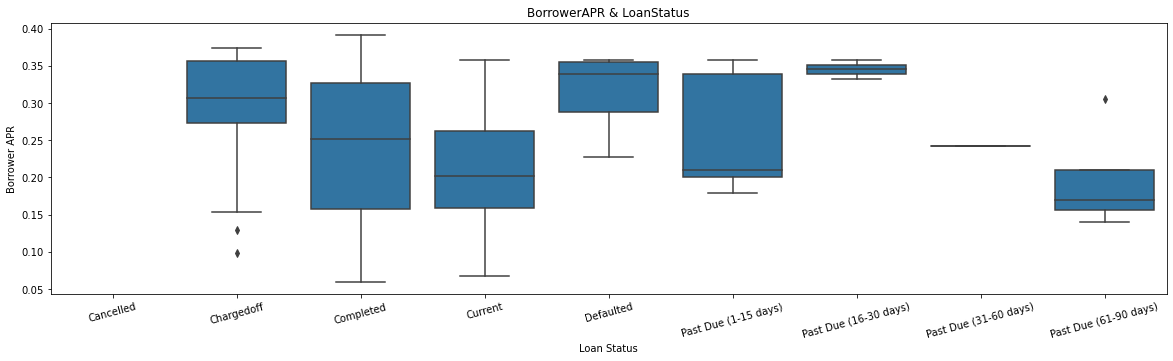

In [27]:
# Borrower APR vs Status of Loan 
plt.figure(figsize = [20, 5])
sns.boxplot(data=df,y='BorrowerAPR',x='LoanStatus',color=base_color);
plt.title('BorrowerAPR & LoanStatus');
plt.ylabel('Borrower APR');
plt.xlabel('Loan Status');
plt.xticks(rotation=15);

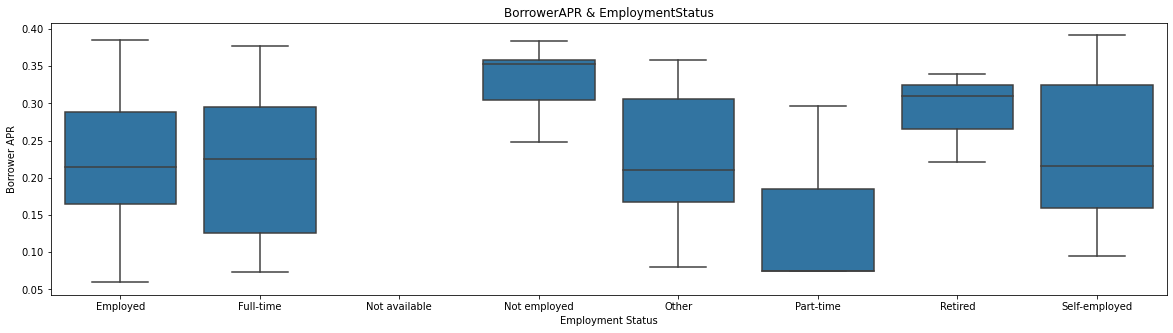

In [28]:
# Borrower APR vs Employment status
plt.figure(figsize = [20, 5])

sns.boxplot(data=df,y='BorrowerAPR',x='EmploymentStatus',color=base_color);
plt.title('BorrowerAPR & EmploymentStatus');
plt.ylabel('Borrower APR');
plt.xlabel('Employment Status');

* On BorrowerAPR vs LoanStatus graph we notice that Current and completed loans have lower rate than the past-due loans and have lower mean.
* On Borrower APR vs Employment status graph we notice that Employed people have lower IQR than not employed

<h4 class="list-group-item list-group-item-action active" >5.  MULTI VARIATE ANALYSIS, FEATURE ENGINEERING</h4>

>#### A. Write a program

    Step 1: Create a  condition = 'LoanStatus'== 'Completed'| 'LoanStatus' == 'Defaulted' |\'LoanStatus' == 'Chargedoff'

    Step2: Create a user define function  using condition and `LoanStatus` column.

    Hint: df['LoanStatus'] = df.apply(user define function , axis=1)
    
        Sample output : 
        
        
        Completed    168
        
        Defaulted     59


>#### B. Write a program

    Step 1: Create a  dictionary called categories = 1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 6: 'Auto', 7: 'Other'

    Step2: Create a user define function  using categories and `ListingCategory (numeric)` column.

    Hint: df['ListingCategory (numeric)'] = df.apply(user define function , axis=1)
    
        Sample output : 
        
        
        Debt Consolidation    106

        Other                  65

        Business               25

        Home Improvement       22

        Auto                    9

>#### C. Display the box plot for `ProsperRating (Alpha)` vs `LoanOriginalAmount` and hue = `Loan Status`[Completed,Defaulted]. Write your observations.

>#### D. Display the catplot for `ProsperRating (Alpha)` vs `ListingCategory (numeric)`[Debt Consolidation,Other,Business,Home Improvement,Auto] and hue = `Loan Status`[Completed,Defaulted]. Write your observations.

### A. Write a program

    Step 1: Create a  condition = 'LoanStatus'== 'Completed'| 'LoanStatus' == 'Defaulted' |\'LoanStatus' == 'Chargedoff'

    Step2: Create a user define funcation using condition and `LoanStatus` column.

    Hint: df['LoanStatus'] = df.apply(user define funcation, axis=1)
    
        Sample output : 
        
        
        Completed    168
        
        Defaulted     59

In [35]:
df['LoanStatus'].value_counts()

Completed    168
Defaulted     59
Name: LoanStatus, dtype: int64

In [36]:

condition = (df['LoanStatus'] == 'Completed') | (df['LoanStatus'] == 'Defaulted') |\
                  (df['LoanStatus'] == 'Chargedoff')
df = df[condition]

def change_to_defaulted(row):
    if row['LoanStatus'] == 'Chargedoff':
        return 'Defaulted'
    else:
        return row['LoanStatus']
    
df['LoanStatus'] = df.apply(change_to_defaulted, axis=1)


* After transforming dataset we have 168 completed loans and 59 defaulted.

### B. Write a program

    Step 1: Create a  dictionary called categories = 1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 6: 'Auto', 7: 'Other'

    Step2: Create a user define funcation using categories and `ListingCategory (numeric)` column.

    Hint: df['ListingCategory (numeric)'] = df.apply(user define funcation, axis=1)
    
        Sample output : 
        
        
        Debt Consolidation    106

        Other                  65

        Business               25

        Home Improvement       22

        Auto                    9



In [30]:
categories = {1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 6: 'Auto', 7: 'Other'}
def reduce_categorie(row):
    loan_category = row['ListingCategory (numeric)']
    if  loan_category in categories:
        return categories[loan_category]
    else:
        return categories[7]
    
df['ListingCategory (numeric)'] = df.apply(reduce_categorie, axis=1)
df['ListingCategory (numeric)'].value_counts()

Debt Consolidation    106
Other                  65
Business               25
Home Improvement       22
Auto                    9
Name: ListingCategory (numeric), dtype: int64

Variable Listing Category is set up as numeric and most of the values have very `low frequency`, for the easier visualization so we have change it to `categorical and reduce the number of categories`. 

### C. Display the box plot for `ProsperRating (Alpha)` vs `LoanOriginalAmount` and hue = `Loan Status`[Completed,Defaulted]. Write your observations.

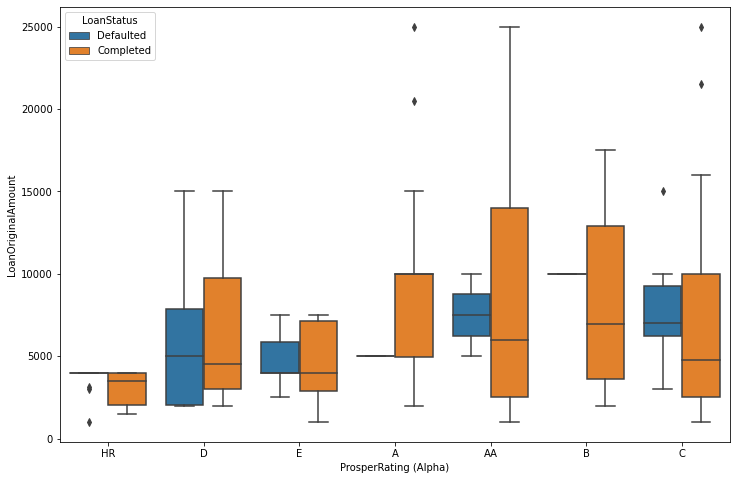

In [31]:
plt.figure(figsize = [12, 8])
sns.boxplot(data=df, x='ProsperRating (Alpha)', y='LoanOriginalAmount', hue='LoanStatus');


* Except for the lowest ratings defaulted credits tend to be larger than completed.
* Most of the defaulted credits comes from individuals with low Prosper rating.

### D. Display the catplot for `ProsperRating (Alpha)` vs `ListingCategory (numeric)`[Debt Consolidation,Other,Business,Home Improvement,Auto] and hue = `Loan Status`[Completed,Defaulted]. Write your observations.

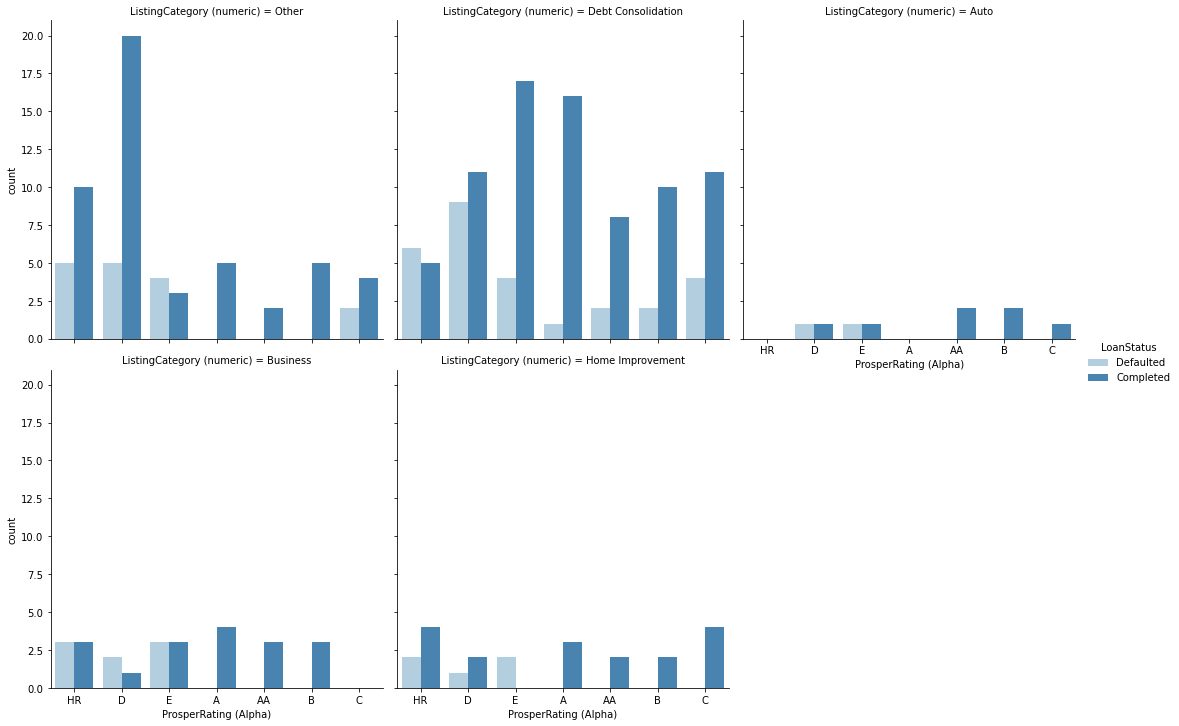

In [32]:
sns.catplot(x = 'ProsperRating (Alpha)', hue = 'LoanStatus', col = 'ListingCategory (numeric)',
              data = df, kind = 'count', palette = 'Blues', col_wrap = 3);


* There are 5 graphs in the second one has much up and downs in it other than all of them.
* There is no substantial difference for default rates in different categories broken up by ratings.